# Impact of Economic Recessions on Automobile Sales

## Project Overview
This project analyzes how economic recessions impact automobile sales across multiple vehicle categories.
The analysis focuses on understanding sales behavior during recession and non-recession periods and how
macroeconomic factors influence consumer purchasing decisions.

## Business Objective
The objective is to provide clear, data-driven insights that help business stakeholders:
- Understand how sales volumes change during economic downturns
- Identify which vehicle types are most affected during recessions
- Assess the role of advertising and economic indicators in sales performance

## Tools & Technologies
- Python
- Pandas
- Matplotlib & Seaborn
- Plotly & Dash

### Installing Required Libraries


In [27]:
# %pip install pandas
# %pip install numpy
# %pip install seaborn
# %pip install folium

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [28]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

---


## Scenario

In this project we will be creating plots which answer questions for analysing "automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

<b>Note:</b> A recession is defined as a significant and widespread decline in economic activity across a country. It is a period where indicators such as employment levels, industrial production, retail sales, and household income decrease for several months, typically marked by a fall in the Gross Domestic Product (GDP). <br>

## Dataset Description

The dataset contains historical automobile sales data enriched with macroeconomic indicators.
It is designed to simulate real-world business conditions during recession and non-recession periods.

## Key Features
The dataset includes the following variables:
<br>**1. Date:** The month end date of sales observation.
<br>**2. Recession:** A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>**3. Automobile_Sales:** The number of vehicles sold during the period.
<br>**4. GDP:** The per capita GDP value in USD.
<br>**5. Unemployment_Rate:** The monthly unemployment rate.
<br>**6. Consumer_Confidence:** A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>**7. Seasonality_Weight:** The weight representing the seasonality effect on automobile sales during the period. This variable represents the seasonal effect on automobile sales for a given month. In the automobile industry, sales often fluctuate throughout the year due to seasonal patterns—for example, sales may increase during the festive season or year-end promotions, and decrease during off-peak months like post-holiday winter periods.
A value greater than 1 indicates higher-than-average sales expected for that month due to seasonal trends (e.g., holiday season or new model launches).
A value less than 1 suggests lower-than-average sales due to seasonal slowdowns.
A value around 1 means the season has neutral or average effect on sales.
<br>**8. Price:** The average vehicle price during the period.
<br>**9. Advertising_Expenditure:** The advertising expenditure of the company.
<br>**10.Vehicle_Type:** The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>**11.Competition:** The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>**12.Month:** Month of the observation extracted from Date..
<br>**13.Year:** Year of the observation extracted from Date.
<br>

### Analytical Perspective
This dataset enables analysis of how economic stress impacts consumer behavior,
sales volume, and strategic spending decisions in the automobile industry.

---


## Importing Data


In [29]:
# Read the CSV data into a pandas dataframe
df = pd.read_csv('../data/automobile_sales.csv')

# Print confirmation
print('Data successfully read into a dataframe!')

Data successfully read into a dataframe!


In [30]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000
mean,2001.520833,0.224432,101.210890,0.737756,41469.506155,2879.743655,6.118845,40.205748,-0.237074,2.441525,3164.160511
std,12.535031,0.417306,10.634092,0.286092,21388.409141,1175.338324,1.964292,16.291271,0.859691,1.108472,3640.137399
min,1980.000000,0.000000,73.900000,0.250000,15001.000000,494.200000,3.000000,12.510000,-4.230000,1.000000,40.000000
25%,1991.000000,0.000000,94.060000,0.500000,22039.000000,1872.000000,4.000000,27.210000,-0.570000,1.600000,923.000000
50%,2002.000000,0.000000,100.800000,0.810000,34957.500000,2883.500000,6.000000,39.420000,-0.005000,2.300000,2381.500000
75%,2012.000000,0.000000,108.320000,0.940000,57418.250000,3902.425000,8.000000,53.862500,0.392500,2.900000,4363.500000
max,2023.000000,1.000000,131.670000,1.500000,79998.000000,4983.000000,9.000000,70.370000,0.820000,6.000000,65645.000000


In [31]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

---


## Creating Visualizations for Data Analysis


#### TASK 1.1: Yearly Trend in Average Automobile Sales

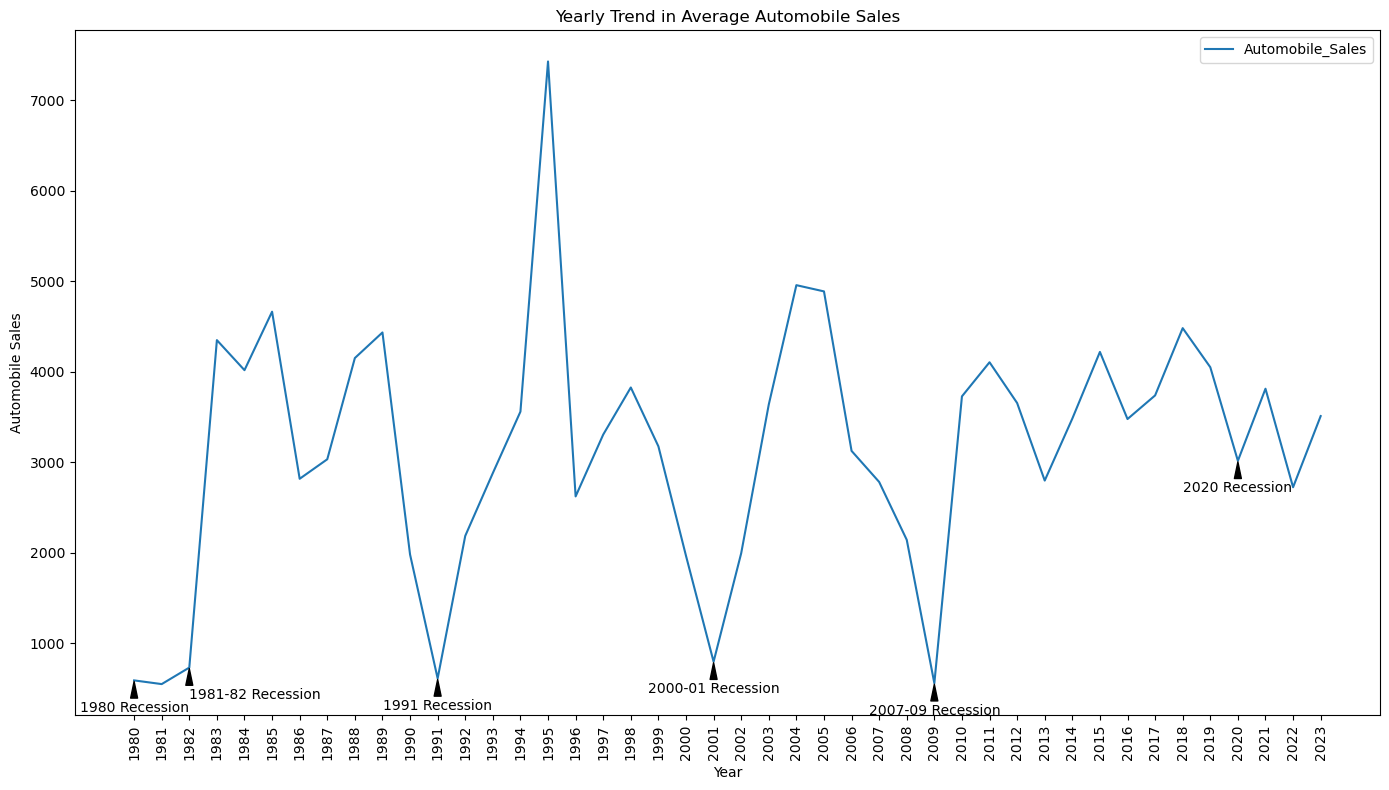

In [32]:
avg_sales_data = df.groupby('Year')['Automobile_Sales'].mean().reset_index()
avg_sales_data.plot(x='Year', y='Automobile_Sales', figsize=(14,8))
plt.title('Yearly Trend in Average Automobile Sales')
plt.xlabel('Year')
plt.xticks(range(1980, 2024), rotation=90)
plt.ylabel('Automobile Sales')

recessions = {
    1980: "1980 Recession",
    1982: "1981-82 Recession",
    1991: "1991 Recession",
    2001: "2000-01 Recession",
    2009: "2007-09 Recession",
    2020: "2020 Recession"
}

for year,label in recessions.items():
    sales_value = avg_sales_data[avg_sales_data['Year'] == year]['Automobile_Sales'].values[0]
    if year == 1982:
        plt.annotate(
        label,
        xy=(year, sales_value),
        xytext=(year, sales_value-350),
        arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5)
    )
    else:
        plt.annotate(
        label,
        xy=(year, sales_value),
        xytext=(year, sales_value-350),
        horizontalalignment='center',
        arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5)
    )
plt.tight_layout()
plt.show()

#### Key Insight:
The line chart shows a clear decline in average automobile sales during known recession periods. This indicates that recessions have a strong negative impact on automobile demand. This trend is expected, as reduced consumer income, higher unemployment, and economic uncertainty during recessions typically lead households to delay or avoid large non-compulsory purchases such as vehicles.

---


####  TASK 1.2: Automobile Sales vs Advertising Expenditure (Non-Recession)

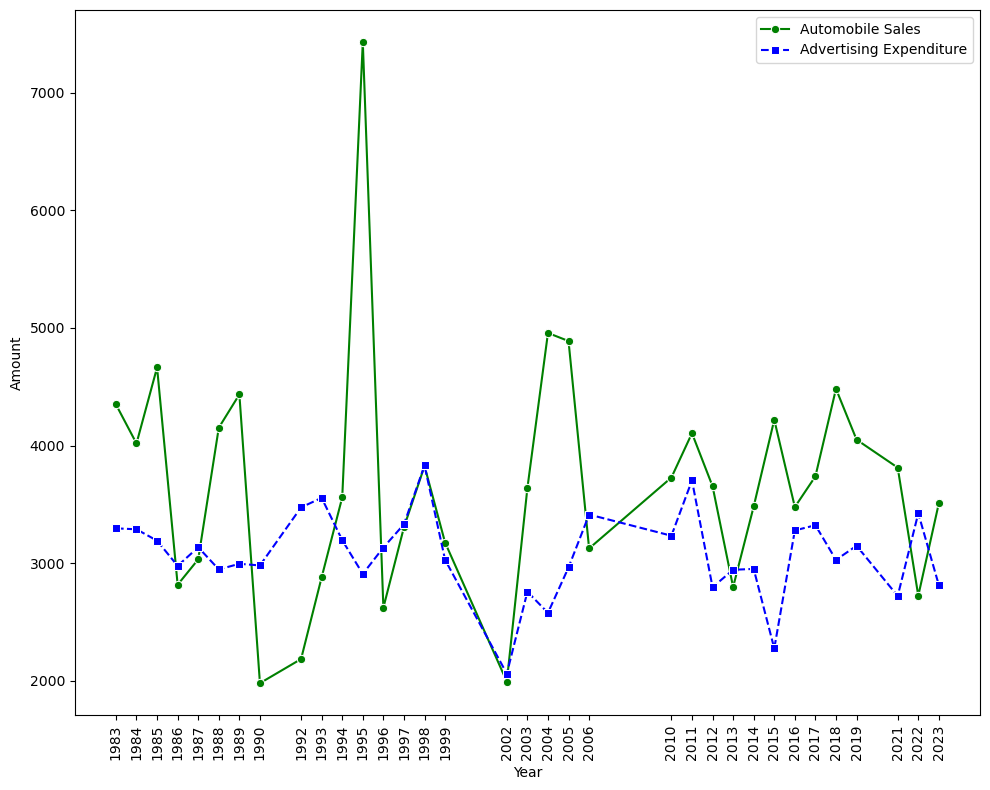

In [33]:
non_recession_data = df[df['Recession'] == 0]
avg_non_recession_sales_data = non_recession_data.groupby('Year')[['Automobile_Sales', 'Advertising_Expenditure']].mean().reset_index()

plt.figure(figsize=(10,8))
sns.lineplot(non_recession_data, x='Year', y='Automobile_Sales', color='Green', linestyle='-', marker='o', label='Automobile Sales', errorbar=None)
sns.lineplot(non_recession_data, x='Year', y='Advertising_Expenditure', color='Blue', linestyle='--', marker='s', label='Advertising Expenditure', errorbar=None)
plt.ylabel('Amount')
plt.xticks(avg_non_recession_sales_data['Year'].unique(), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

#### Key Insight:
We infer that during non-recession periods, sales is more volatile, meaning it depends on multiple factors other than advertising expenditure. While there are periods where increasing ad expense increases sales, like the period between 2002-2005. We can confidently say that while ad expense is a controlled amount, sales cannot be interpreted through it alone

#### Trying scatter plot for the above relationship

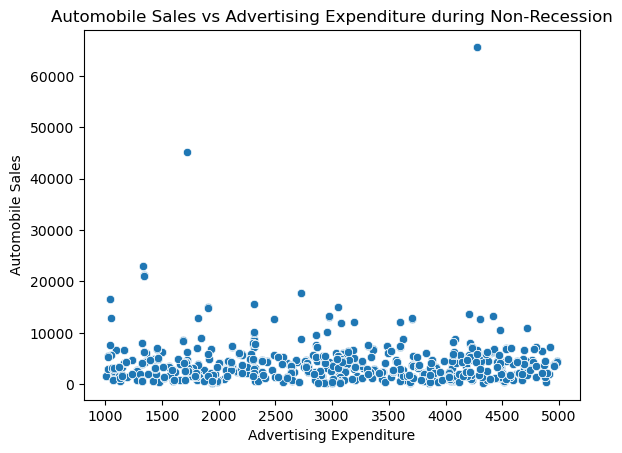

In [36]:
sns.scatterplot(data=non_recession_data, x='Advertising_Expenditure', y='Automobile_Sales')
plt.title('Automobile Sales vs Advertising Expenditure during Non-Recession')
plt.xlabel('Advertising Expenditure')
plt.ylabel('Automobile Sales')
plt.show()

#### Key Insight:
The random scattering of data points in the above scatter plot indicates no correlation between Automobile Sales and Advertising Expenditure. This strengthens our point made in the previous plot, that there are other factors at play that affect the automobile sales

----


#### TASK 1.3: Average Sales (Recession vs Non-Recession)

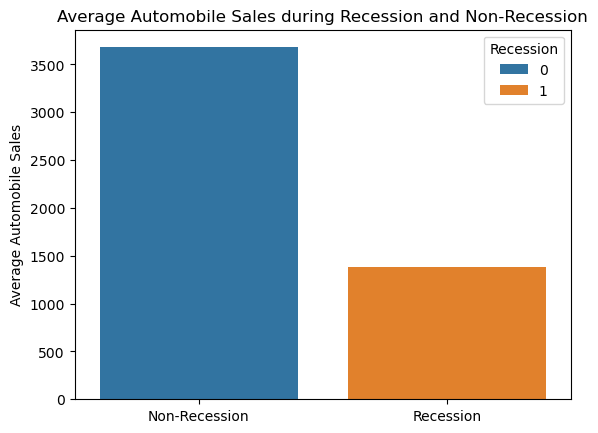

In [37]:
avg_sales = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
sns.barplot(data=avg_sales, x='Recession', y='Automobile_Sales', hue='Recession')
plt.xlabel(None)
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks([0,1], labels=['Non-Recession', 'Recession'])
plt.show()

#### Key Insight:
We observe that average sales during Non-Recession are more than twice of the sales during Recession. This is consistent with household behavior during economic downturns, as it is expected for them to opt not to make non-compulsory purchases during economic downturns

---

#### Task 1.4: Average Vehicle-wise Sales (Recession vs Non-Recession)

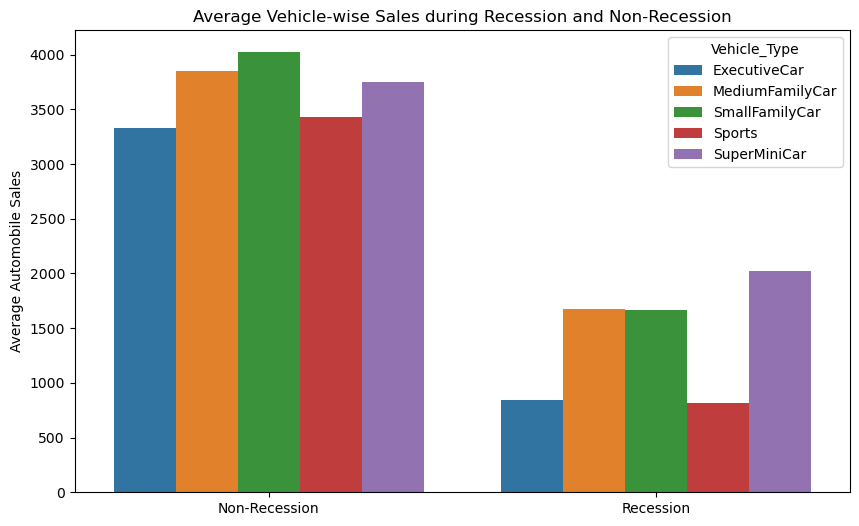

In [38]:
avg_vehicle_type_sales = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=avg_vehicle_type_sales, x='Recession', y='Automobile_Sales', hue='Vehicle_Type')
plt.xlabel(None)
plt.ylabel('Average Automobile Sales')
plt.title('Average Vehicle-wise Sales during Recession and Non-Recession')
plt.xticks([0,1], labels=['Non-Recession', 'Recession'])
plt.show()

#### Key Insight:
From the above bar chart, we infer that during Recession, the sales for all Vechicle types dropped significantly, by almost half, and in the case of Executive and Sports cars, sales dropped to less than half of their original volume (the biggest percentage drop of any category). When compared to other vehicle types, we can see that during Recession, family cars, and super mini cars had the most sales, showing that people who needed a car, opted for practical, and affordable options. 

This shows us that economic downturn, had a direct impact on the sales

---


#### TASK 1.5: Year Trend in GDP (Recession vs Non-Recession)

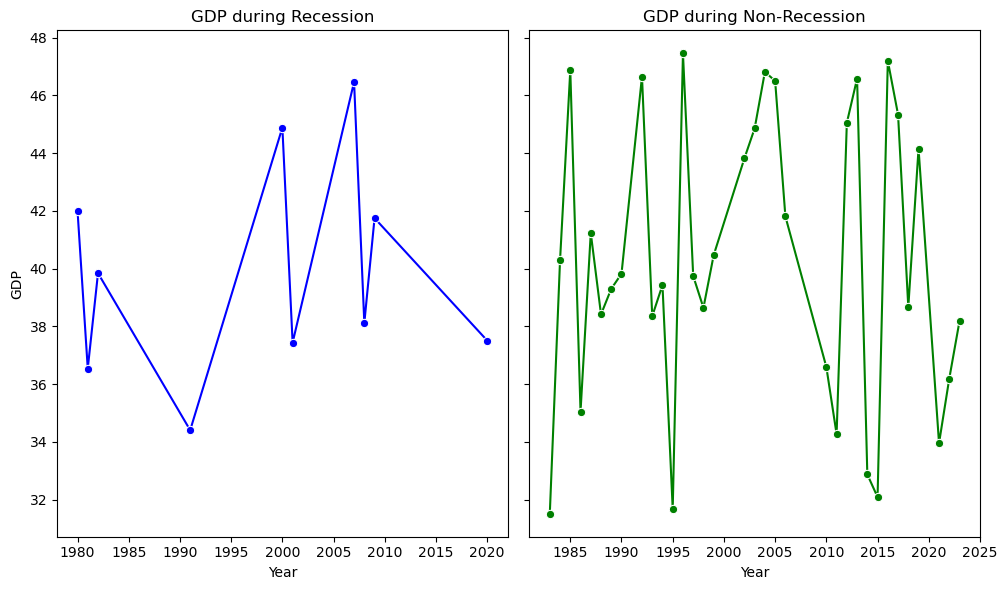

In [43]:
recession_data = df[df['Recession'] == 1]
non_recession_data = df[df['Recession'] == 0]

fig, ax = plt.subplots(1,2, figsize=(10,6), sharey=True)
sns.lineplot(data=recession_data, x='Year', y='GDP', ax=ax[0], errorbar=None, marker='o', color='blue')
ax[0].set_title('GDP during Recession')

sns.lineplot(data=non_recession_data, x='Year', y='GDP', ax=ax[1], errorbar=None, marker='o', color='green')
ax[1].set_title('GDP during Non-Recession')


plt.tight_layout()
plt.show()

#### Key Insight:
While GDP consistently achieves higher peaks during non-recessionary periods, the above graph suggests that a recession is not the sole predictor of economic decline. This is evidenced by the fact that some of the lowest recorded GDPs occurred during non-recession years. Therefore, while economic cycles clearly influence GDP, they do not fully explain its volatility, which is likely subject to other external factors.

---


#### TASK 1.6: Impact of seasonality on Automobile Sales.

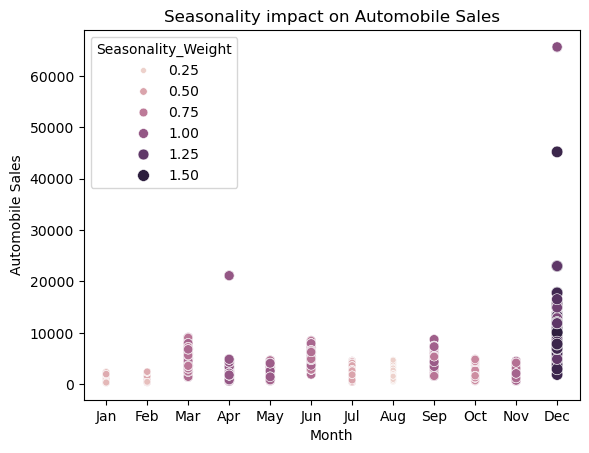

In [44]:
sns.scatterplot(non_recession_data, x='Month', y='Automobile_Sales', size='Seasonality_Weight', hue='Seasonality_Weight')
plt.title('Seasonality impact on Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.show()

#### Key Insight:
The plot suggests that there is no consistent seasonal trend across the entire year, as sales remain relatively flat and low for ten out of twelve months. However, there are significant seasonal anomalies in April and December. We can consider the singular April spike in sales to be an outlier, but the December spike is particularly strong and aligns with high seasonality weights, suggesting that while the market is generally stable, it is prone to extreme surges during specific holiday or promotional periods.

---


 #### TASK 1.7: Consumer Confidence vs Automobile Sales (Recession)

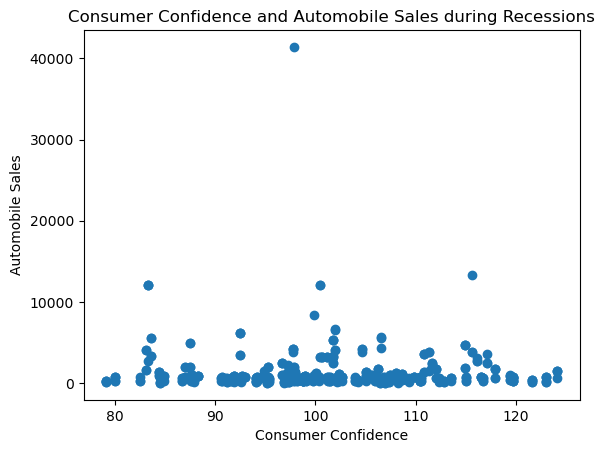

In [45]:
plt.scatter(data=recession_data, x='Consumer_Confidence', y='Automobile_Sales')
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

#### Key Insight:
We can observe that there is no correlation between Consumer Confidence and Automobile Sales, this is indicated by the random scattering of the data points in the plot. We also observe that with all values of Consumer Confidence, the Sales remain around 10000 or less, with only three points slightly above 10000, and only one outlier, at around 97-98 Consumer Confidence. This shows that Consumer Confidence is not the primary driver of sales during Recession

---

#### Task 1.8 Vehicle Price vs Automobile Sales (Recession)

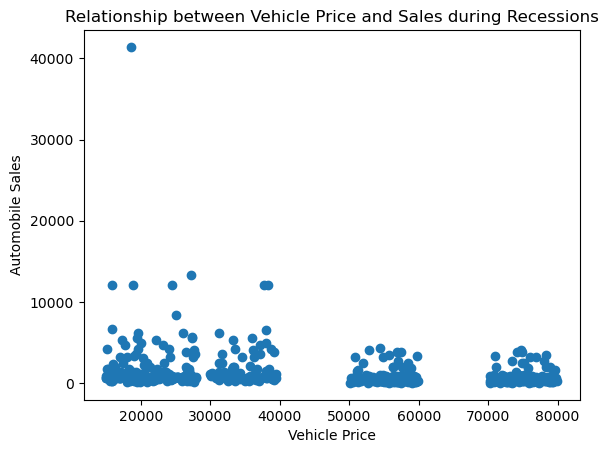

In [46]:
plt.scatter(data=recession_data, x='Price', y='Automobile_Sales')
plt.xlabel('Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Vehicle Price and Sales during Recessions')
plt.show()

#### Key Insight:
We observe a weak negative correlation between Vehicle Price and Automobile Sales, as higher priced cars constitute lower volume of sales. We observe that vehile from 40000 and below constitute the most sales volume, and higher priced cars take a dip in sales volume. This shows that during recession, people opt for affordable options.

----


 #### TASK 1.9: Portion of Advertising expenditure during recession and non-recession periods.

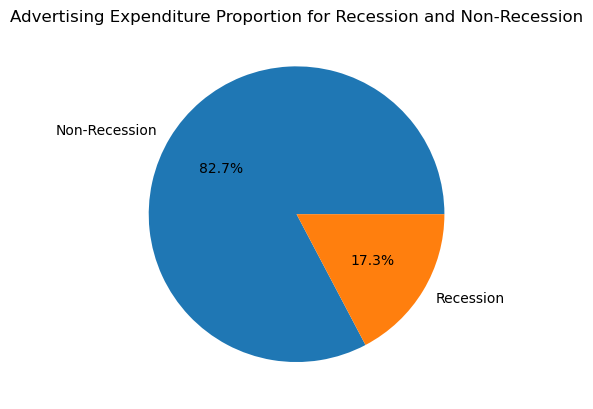

In [47]:
exp_recession = recession_data['Advertising_Expenditure'].sum()
exp_non_recession = non_recession_data['Advertising_Expenditure'].sum()

sizes = [exp_non_recession, exp_recession]
labels = ['Non-Recession', 'Recession']

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Advertising Expenditure Proportion for Recession and Non-Recession')
plt.show()

#### Key Insight:
From the above pie chart we observe that the company spends only 17.3% of the total Advertising Expenditure, during Recession. Which is justified, since it is expected that during Recession people would naturally try to conserve their earning. So instead of going into a potential loss, the company might have opted less advertising expense, and allocated that money somewhere else

---


#### TASK 1.10: Proportion of the total Advertisement expenditure for each vehicle type during recession period.

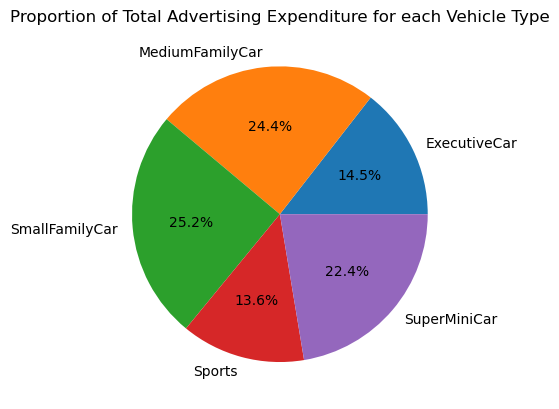

In [48]:
rec_vehicle_type_exp = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()

labels = list(rec_vehicle_type_exp['Vehicle_Type'])
sizes = list(rec_vehicle_type_exp['Advertising_Expenditure'])

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of Total Advertising Expenditure for each Vehicle Type')
plt.show()

#### Key Insight:
From the above pie chart we observe that the company focused more on advertising Family and Super mini cars, which are affordable options (70% of the total Advertising Expenditure focused here). This is a wise decision by the company, as during economic downfall, the people who need cars, would naturally be inclined towards more affordable options

----


 #### TASK 1.9: Effect of the unemployment rate on vehicle type and sales during the Recession Period.

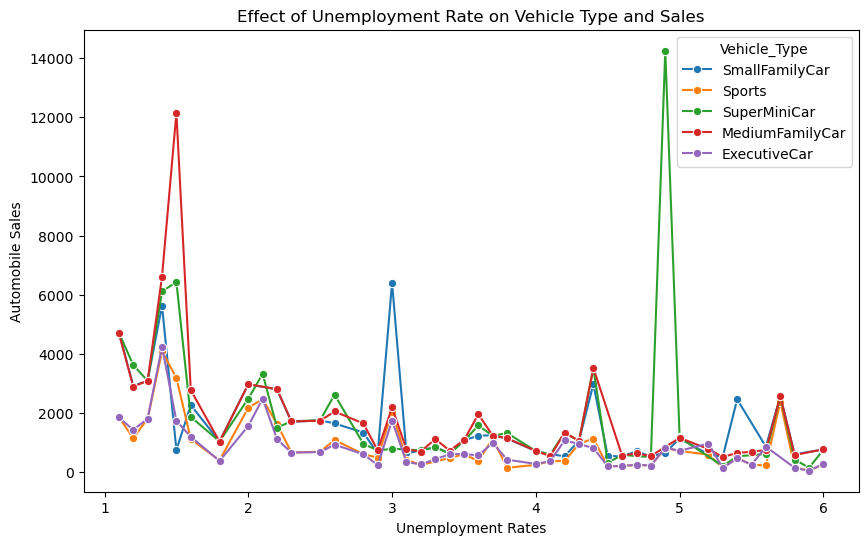

In [49]:
plt.figure(figsize=(10,6))
sns.lineplot(data=recession_data, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', marker='o', errorbar=None)
plt.ylabel('Automobile Sales')
plt.xlabel('Unemployment Rates')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.show()

#### Key Insight:
We observe from the above line plot, that in general during recession, as unemployment increases, the sales decrease. We observe that the sales of Executive and Sports cars remain low, and only decrease further as unemployment increases. We do observe at a few points, that the sales of Family and Super Mini cars peak, this is due to the fact that when people did buy cars, they opted for affordable options.

---


## Author
[Ali Nazir](https://github.com/alinazir105)